# Import libraries and datasets

In [51]:
library(ggplot2)
library(dplyr)
library(AppliedPredictiveModeling)
library(lattice)


data(FuelEconomy)

### Function for multiplotting

In [102]:
multiplot <- function(..., plotlist = NULL, file, cols = 1, layout = NULL) {
  require(grid)

  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  if (is.null(layout)) {
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                 ncol = cols, nrow = ceiling(numPlots/cols))
}

if (numPlots == 1) {
print(plots[[1]])

} else {
grid.newpage()
pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

for (i in 1:numPlots) {
  matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

  print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                  layout.pos.col = matchidx$col))
 }
}
}

In [52]:
# sort each dataset by EngDispl

cars2010 <- cars2010[order(cars2010$EngDispl), ]
cars2011 <- cars2011[order(cars2011$EngDispl), ]

In [53]:
#combine two datasets into one dataframe

cars2010a <- cars2010
cars2010a$Year <- "2010 Model Year"
cars2011a <- cars2011
cars2011a$Year <- "2011 Model Year"

plotData <- rbind(cars2010a, cars2011a) #bind rows : same as pd.concat in python

In [55]:
head(plotData)

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift,Year
1130,1.0,3,Other,57.8000,NaturallyAspirated,5,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0,2010 Model Year
1131,1.0,3,Other,57.8000,NaturallyAspirated,5,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0,2010 Model Year
1279,1.3,2,M6,30.2000,NaturallyAspirated,6,0,0,TwoWheelDriveRear,0,0,SubcompactCars,0,0,2010 Model Year
1280,1.3,2,S6,32.1000,NaturallyAspirated,6,1,0,TwoWheelDriveRear,0,0,SubcompactCars,0,0,2010 Model Year
1365,1.3,4,AV,65.0000,NaturallyAspirated,1,1,0,TwoWheelDriveFront,1,1,CompactCars,1,1,2010 Model Year
1366,1.3,4,Other,62.2674,NaturallyAspirated,1,1,0,TwoWheelDriveFront,1,1,CompactCars,1,1,2010 Model Year


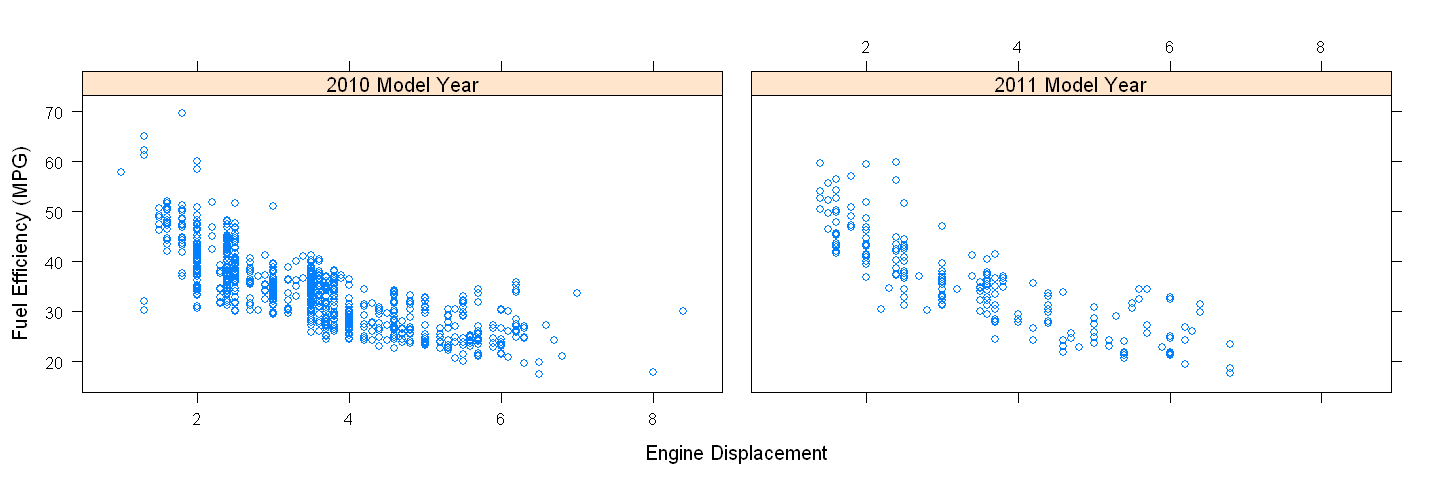

In [69]:
options(figure.width = 12, figure.height=5)

xyplot(FE~EngDispl|Year, data = plotData,
           xlab = "Engine Displacement", 
           ylab = "Fuel Efficiency (MPG)", 
           between = list(x=1.2))

There'e is negative correlation between two variables.  However, at the end point, the value of the FE goes up as Engine Displacement level increases. Normal linear model cannot catch this change so it'd be greater to use more advanced version than just normal linear model.

In [73]:
# Fir a single linear model and conduct 10-fold CV to estimate the error
library(caret)

set.seed(1)
lm1Fit <-  train(FE~ EngDispl,
                 data = cars2010, 
                 method = 'lm', 
                 trControl = trainControl(method='cv'))  #conduct cross-validation using training dataset(default = 10)

In [74]:
lm1Fit

Linear Regression 

1107 samples
   1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 997, 996, 996, 997, 995, 997, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  4.617947  0.6271384  3.519007

Tuning parameter 'intercept' was held constant at a value of TRUE

In [98]:
cars2010$lm1 <- predict(lm1Fit, cars2010)

In [99]:
head(cars2010)

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift,ED2,lm1
1130,1.0,3,Other,57.8000,NaturallyAspirated,5,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0,1.00,46.04230
1131,1.0,3,Other,57.8000,NaturallyAspirated,5,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0,1.00,46.04230
1279,1.3,2,M6,30.2000,NaturallyAspirated,6,0,0,TwoWheelDriveRear,0,0,SubcompactCars,0,0,1.69,44.68602
1280,1.3,2,S6,32.1000,NaturallyAspirated,6,1,0,TwoWheelDriveRear,0,0,SubcompactCars,0,0,1.69,44.68602
1365,1.3,4,AV,65.0000,NaturallyAspirated,1,1,0,TwoWheelDriveFront,1,1,CompactCars,1,1,1.69,44.68602
1366,1.3,4,Other,62.2674,NaturallyAspirated,1,1,0,TwoWheelDriveFront,1,1,CompactCars,1,1,1.69,44.68602


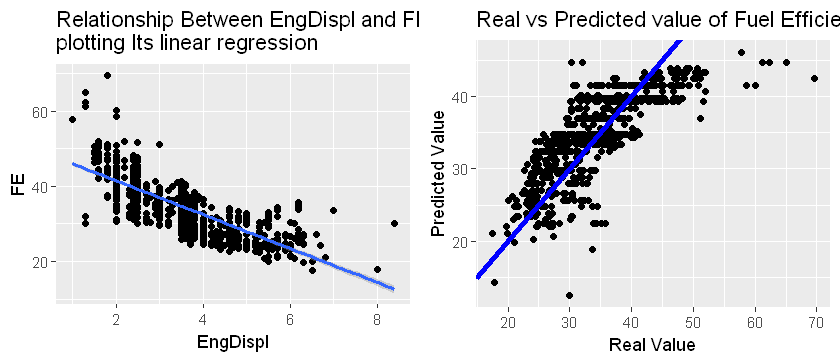

In [178]:
options(repr.plot.width=7, repr.plot.height=3)

p1 <- ggplot(data= cars2010, aes(EngDispl, FE))  + 
            geom_point() + geom_smooth(method='lm') +
             ggtitle('Relationship Between EngDispl and FE \nplotting Its linear regression')

p2 <-ggplot(data=cars2010) + 
            geom_point(aes(FE, lm1)) + geom_abline(colour = 'blue', size=1.5)+
                ylab('Predicted Value') + xlab('Real Value') + ggtitle('Real vs Predicted value of Fuel Efficiency')


layout <- matrix(c(1,2),1,2,byrow=TRUE)
multiplot(p1, p2,  layout=layout)

In [124]:
lm1 <- lm(FE ~ EngDispl, data= cars2010)
lm1


Call:
lm(formula = FE ~ EngDispl, data = cars2010)

Coefficients:
(Intercept)     EngDispl  
     50.563       -4.521  


The left plot shows the relationship between FE and EnglDispl. These two has the negatively correlated. The intercept is 50.563 and the slope is about -4.5. As I mentioned above, the problem of linear regression in this model is that the model cannot capture the increasing level of FE when EngDispl is above 6. So if you see the right plot, you can observe that our model is doing pretty well when the target value is below 50. However, as soon as it surpasses this number, our model predicted much lower value than the actual one. Solution for  this problem can be adding much more feature  or using non-linear model , ect.


In [125]:
#Fit a quadratic model this time

cars2010$ED2 <- cars2010$EngDispl **2
cars2011$ED2 <- cars2011$EngDispl **2

set.seed(1)

lm2Fit <- train(FE~ EngDispl + ED2, 
                         data = cars2010,  
                         method = 'lm',
                         trControl = trainControl(method ='cv') )

lm2Fit

Linear Regression 

1107 samples
   2 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 997, 996, 996, 997, 995, 997, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  4.232604  0.6837765  3.236312

Tuning parameter 'intercept' was held constant at a value of TRUE

In [129]:
cars2010$poly <- predict(lm2Fit, cars2010)
cars2011$poly <- predict(lm2Fit, cars2011)

In [130]:
head(cars2010)

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift,ED2,lm1,poly
1130,1.0,3,Other,57.8000,NaturallyAspirated,5,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0,1.00,46.04230,52.30115
1131,1.0,3,Other,57.8000,NaturallyAspirated,5,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0,1.00,46.04230,52.30115
1279,1.3,2,M6,30.2000,NaturallyAspirated,6,0,0,TwoWheelDriveRear,0,0,SubcompactCars,0,0,1.69,44.68602,49.38615
1280,1.3,2,S6,32.1000,NaturallyAspirated,6,1,0,TwoWheelDriveRear,0,0,SubcompactCars,0,0,1.69,44.68602,49.38615
1365,1.3,4,AV,65.0000,NaturallyAspirated,1,1,0,TwoWheelDriveFront,1,1,CompactCars,1,1,1.69,44.68602,49.38615
1366,1.3,4,Other,62.2674,NaturallyAspirated,1,1,0,TwoWheelDriveFront,1,1,CompactCars,1,1,1.69,44.68602,49.38615


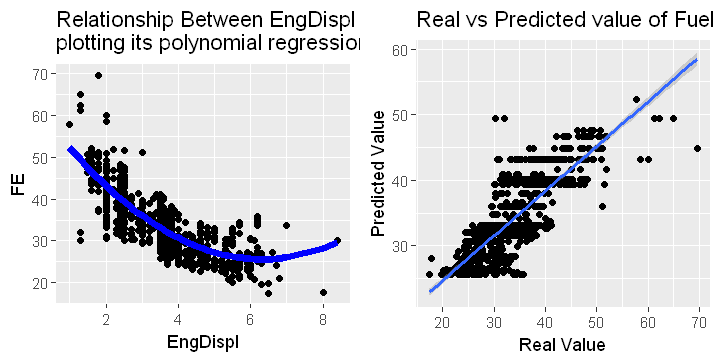

In [161]:
options(repr.plot.width=6, repr.plot.height=3)

p1 <- ggplot(cars2010) + geom_point(aes(EngDispl,FE)) + geom_line(aes(EngDispl,poly),colour='blue', size=2) +
                     ggtitle('Relationship Between EngDispl and FE \nplotting its polynomial regression')

p2 <- ggplot(data= cars2010, aes(FE, poly))  + 
            geom_point() + geom_smooth(method='lm') +
                ylab('Predicted Value') + xlab('Real Value') + ggtitle('Real vs Predicted value of Fuel Efficiency')

layout <- matrix(c(1,2),1,2,byrow=TRUE)
multiplot(p1, p2,  layout=layout)

The problem of this model is predicting too high for explanatory values above 7. Here, we're going to use MARS(Multivariate Adaptive Regression Spline) to improve this polynomial model. MARS gets its best model by searching the best spline of the singular variable (EngDispl , in this case). One of the drawback of MARS is that there is no way for us to find how many splines is needed. So it has the intrinsic algorithm to find the best parameter. You can see the best RMSE for MARS is about 4.22, and this is the best model MARS is going to use when predicting the target value. 

Multivariate Adaptive Regression Spline 

1107 samples
   1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 997, 996, 996, 997, 995, 997, ... 
Resampling results across tuning parameters:

  nprune  RMSE      Rsquared   MAE     
  2       4.301139  0.6731346  3.313975
  3       4.260743  0.6793933  3.274158
  4       4.229296  0.6842278  3.224616
  5       4.220445  0.6856784  3.202756

Tuning parameter 'degree' was held constant at a value of 1
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were nprune = 5 and degree = 1.

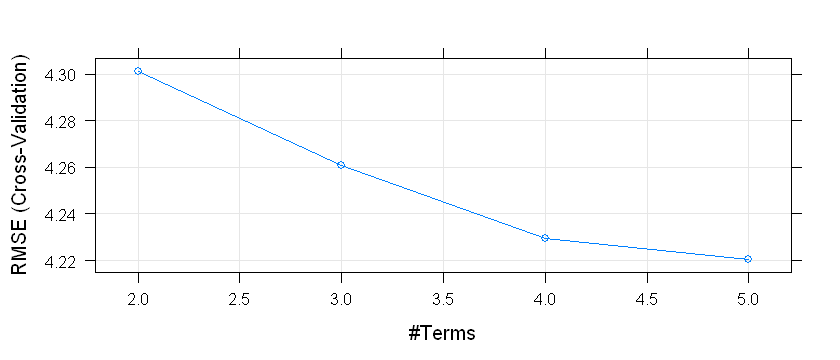

In [163]:
library(earth)
set.seed(1)
marsFit <- train(FE ~ EngDispl, 
                 data = cars2010,
                 method = "earth",
                 tuneLength = 15,
                 trControl = trainControl(method= "cv"))
marsFit

plot(marsFit)

In [166]:
cars2010$mars <- predict(marsFit, cars2010)
cars2011$mars <- predict(marsFit, cars2011)

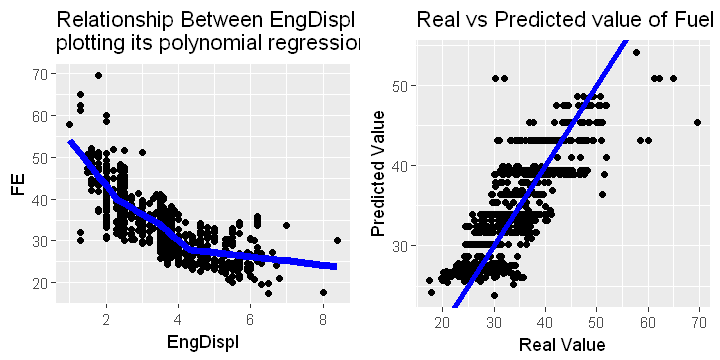

In [176]:
options(repr.plot.width=6, repr.plot.height=3)

p1 <- ggplot(cars2010) + geom_point(aes(EngDispl,FE)) + geom_line(aes(EngDispl,mars),colour='blue', size=2) +
                     ggtitle('Relationship Between EngDispl and FE \nplotting its polynomial regression')

p2 <-p2 <-ggplot(data=cars2010) + 
            geom_point(aes(FE, mars)) + geom_abline(colour = 'blue', size=1.5)+
                ylab('Predicted Value') + xlab('Real Value') + ggtitle('Real vs Predicted value of Fuel Efficiency')


layout <- matrix(c(1,2),1,2,byrow=TRUE)
multiplot(p1, p2,  layout=layout)

In [185]:
lm1Fit;
print('********************************************************')
lm2Fit;
print('********************************************************')
marsFit

Linear Regression 

1107 samples
   1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 997, 996, 996, 997, 995, 997, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  4.617947  0.6271384  3.519007

Tuning parameter 'intercept' was held constant at a value of TRUE

[1] "********************************************************"


Linear Regression 

1107 samples
   2 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 997, 996, 996, 997, 995, 997, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  4.232604  0.6837765  3.236312

Tuning parameter 'intercept' was held constant at a value of TRUE

[1] "********************************************************"


Multivariate Adaptive Regression Spline 

1107 samples
   1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 997, 996, 996, 997, 995, 997, ... 
Resampling results across tuning parameters:

  nprune  RMSE      Rsquared   MAE     
  2       4.301139  0.6731346  3.313975
  3       4.260743  0.6793933  3.274158
  4       4.229296  0.6842278  3.224616
  5       4.220445  0.6856784  3.202756

Tuning parameter 'degree' was held constant at a value of 1
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were nprune = 5 and degree = 1.

As we improve the model from the simple linear regression to MARS, RMSE decrases. It might be a positive sign for our model because the error is getting lower. However, we need to make it sure that we're just training our model using training set and check the rmse by comparing the real value and predicted value for training datasets. In this case, it's dangerous to conclude that the last model is the best one because it might be overfitting to the training data. This means even though this model is predicting well for the data it observed beforehand, it might underperform when predicting the value for unseen data. So, when we pick the model, we need to check the loss term using validation set to convince this model is doing well even for the data it never observed.